In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### David Langus Rodriguez, Dean Ward, and Albert DiCroce worked as a group for this assignment.

## Problem 1
### 1.

Overall yield is 8000 of 14000 parts or 57.14%

## Problem 2
### 1.

Because the Verilog code executes in parallel, the value of x will be 1 (x = 1) and the value for y will be 2 (y = 2)

### 2.

Because C language executes sequentially the value for x will not be initialized with the (a + b) value. The variable x will be equal to 1 (x = 1) since x will be at the initialized value 

### 3.

Since Verilog executes in parallel and C sequantially there is a difference.

## Problem 3
### 1.

In [2]:
df = pd.read_csv('./fullFreqData/fpga1.csv', header=None)

In [3]:
df.shape

(512, 100)

In [4]:
df_t = df.T

In [5]:
df_t

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,185.752,186.415,186.443,187.257,187.638,185.049,186.154,187.196,187.427,187.268,...,187.431,187.752,187.632,187.206,187.868,187.442,186.844,188.694,187.152,186.871
1,185.752,186.460,186.424,187.286,187.615,185.041,186.141,187.147,187.408,187.249,...,187.434,187.754,187.511,187.192,187.865,187.372,186.924,188.689,187.150,186.798
2,185.704,186.457,186.394,187.278,187.558,185.071,186.184,187.133,187.423,187.214,...,187.369,187.799,187.514,187.222,187.880,187.432,186.865,188.691,187.157,186.789
3,185.696,186.404,186.435,187.183,187.616,185.062,186.194,187.216,187.415,187.254,...,187.423,187.765,187.545,187.172,187.843,187.415,186.908,188.681,187.134,186.863
4,185.673,186.434,186.381,187.270,187.567,185.064,186.118,187.160,187.397,187.257,...,187.414,187.761,187.487,187.193,187.805,187.422,186.876,188.657,187.117,186.834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,185.450,186.152,186.069,187.028,187.397,184.867,185.944,186.909,187.164,186.990,...,187.208,187.598,187.365,186.914,187.663,187.245,186.621,188.443,186.943,186.618
96,185.438,186.148,186.187,187.069,187.405,184.836,185.889,186.955,187.169,187.075,...,187.235,187.611,187.374,186.913,187.648,187.240,186.682,188.449,186.939,186.627
97,185.463,186.162,186.166,187.030,187.410,184.841,185.945,186.989,187.167,187.106,...,187.212,187.627,187.371,186.951,187.675,187.283,186.672,188.458,186.973,186.599
98,185.450,186.181,186.182,187.021,187.412,184.853,185.897,186.978,187.179,187.049,...,187.285,187.641,187.315,186.944,187.675,187.242,186.640,188.455,186.886,186.577


### 2.

In [6]:
means = df_t.describe().T["mean"]

In [7]:
means_np = np.array(means)

In [8]:
means_np_reshaped = np.flip(means_np.reshape(32, 16), axis=0)

In [9]:
means_np_reshaped.shape

(32, 16)

### 3.

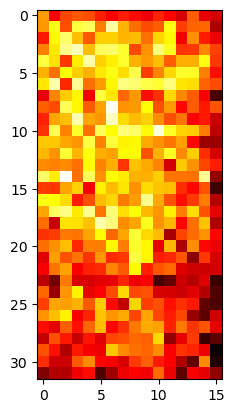

In [10]:
a = np.random.random((32, 16))
plt.imshow(means_np_reshaped, cmap='hot', interpolation='nearest')
plt.show()

### 4.
The heatmap below show a visual representation of the FPGA die and of which PUF freqencies are higher/low. The top center of the FPGA had the higher measured PUF clock frequencies. This is probably due to the less interconnect delays in that area of the chip and allow the RO to achieve a higher frequency 

## Problem 4
### 1 & 2.

In [11]:
array_of_pufs = []
for i in range(193):
    puf = np.zeros(256)
    df = pd.read_csv(f'./fullFreqData/fpga{i+1}.csv', header=None)
    df_t = df.T
    means = df_t.describe().T["mean"]
    means_np = np.array(means)
    means_np_reshaped = means_np.reshape(256, 2)
    for j in range(256):
        if means_np_reshaped[j, 0] >= means_np_reshaped[j, 1]:
            puf[j] = True
            # puf[j] = 1
        else:
            # puf[j] = 0
            puf[j] = False
        
    array_of_pufs.append(puf)
    #print(np.array(array_of_pufs)[i])

In [12]:
# Function to convert string of bit to a ByteArray
def bitstring_to_bytes(s):
    v = int(s, 2)
    b = bytearray()
    while v:
        b.append(v & 0xff)
        v >>= 8
    return bytes(b[::-1])

In [13]:
fpga_puf_1 = array_of_pufs[0].astype(int)
bit_string = np.array2string(fpga_puf_1).replace('\n', '').replace('[', '').replace(']', '').replace(' ', '')

print(bitstring_to_bytes(bit_string).hex())

2db7bf6cc7461f85c35a0b794dd179d587ffffe97e0f37d01b0bdbaf155939ad


### 3.

In [14]:
# Calculate Hamming distances for all FPGAs pairs
unique_array_of_pufs = []
hamming = []
num_loops = 192 # Will stil loop through all 193 cause k=i+1
for i in range(num_loops):
    uniq_puf = np.zeros(256)
    puf1 = array_of_pufs[i].astype(bool) 
    k = i+1 
    while k <= num_loops:
        puf2 = array_of_pufs[k].astype(bool) 
        for j in range(256):
            uniq_puf[j] = puf1[j] ^ puf2[j]
            # print(puf1)
            # print(puf2)
        # print(uniq_puf)
        hamming = np.sum(uniq_puf, 0)
        # print(hamming)
        k+=1
        unique_array_of_pufs.append(hamming)

In [15]:
len(unique_array_of_pufs) # Total number of Hamming distances 192*193/2

18528

In [16]:
hamming_d = np.array(unique_array_of_pufs)

In [17]:
hamming_mean = np.mean(hamming_d) # Mean
hamming_mean

118.73024611398964

In [18]:
np.median(hamming_d) # Median

119.0

In [19]:
np.std(hamming_d) # Standard Div.

8.090671702168963

### 4.

In [20]:
(hamming_mean / 256 * 100) # Uniqueness 

46.3790023882772

- 50% is the ideal uniqueness, our PUFs exibit good uniqueness values with respect to the ideal (46.37%)

In [21]:
# hamming_dist = np.sum(unique_array_of_pufs, 1)
hamming_mean = (np.sum(unique_array_of_pufs, None)/np.size(unique_array_of_pufs))
print(hamming_mean)
print(np.median(unique_array_of_pufs, None))
print(np.std(unique_array_of_pufs, None))
# Number 4.4
print((hamming_mean/256) *100)

118.73024611398964
119.0
8.090671702168963
46.3790023882772


## Problem 5
### 1 & 2.

In [22]:
array_of_pufs = []

puf = np.zeros(256)
df = pd.read_csv(f'./fullFreqData/fpga1.csv', header=None)
df_t = df.T
#means = df_t.describe().T["mean"]
data = np.array(df_t)
data_re = data.reshape(100, 256, 2)
#print(data_re)
for i in range(100):
    for j in range(256):
        if data_re[i, j, 0] >= data_re[i, j, 1]:
            puf[j] = True
            # puf[j] = 1
        else:
            # puf[j] = 0
            puf[j] = False

    array_of_pufs.append(puf)
print(np.array(array_of_pufs)[i].shape)

(256,)


### 3.

In [23]:
# Calculate Hamming distances for all FPGAs pairs
unique_array_of_pufs = []
hamming = []
num_loops = 99 # Will stil loop through all 100 cause k=i+1
for i in range(num_loops):
    uniq_puf = np.zeros(256)
    puf1 = array_of_pufs[i].astype(bool) 
    k = i+1 
    while k <= num_loops:
        puf2 = array_of_pufs[k].astype(bool) 
        for j in range(256):
            uniq_puf[j] = puf1[j] ^ puf2[j]
            # print(puf1)
            # print(puf2)
        # print(uniq_puf)
        hamming = np.sum(uniq_puf, 0)
        # print(hamming)
        k+=1
        unique_array_of_pufs.append(hamming)

In [24]:
len(unique_array_of_pufs) # Total number of Hamming distances 99*100/2

4950

In [25]:
hamming_d = np.array(unique_array_of_pufs)

In [26]:
hamming_mean = np.mean(hamming_d) # Mean
hamming_mean

0.0

In [27]:
np.median(hamming_d) # Median

0.0

In [28]:
np.std(hamming_d) # Standard Div.

0.0

### 4.

In [29]:
(hamming_mean / 256 * 100) # Reliableness

0.0

- 0% is the ideal reliableness, our PUFs exibit good reliability values with respect to the ideal (0%)

## Problem 6
### 1 & 2.

In [30]:
array_of_pufs = []
for i in range(193):
    puf = np.zeros(256)
    df = pd.read_csv(f'./fullFreqData/fpga{i+1}.csv', header=None)
    df_t = df.T
    means = df_t.describe().T["mean"]
    means_np = np.array(means)
    means_np_reshaped = means_np.reshape(256, 2)
    for j in range(256):
        if means_np_reshaped[j, 0] >= means_np_reshaped[j, 1]:
            puf[j] = True
            # puf[j] = 1
        else:
            # puf[j] = 0
            puf[j] = False
        
    array_of_pufs.append(puf)
print(np.array(array_of_pufs)[0])

[0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]


### 3.

In [31]:
uniformity_per_puf = []
for puf in np.array(array_of_pufs):
    unique, counts = np.unique(puf, return_counts=True)
    uniformity_per_puf.append(counts[0] / 256 * 100)

In [32]:
np.array(uniformity_per_puf) # Uniformity per PUF with respect to the zero (0) bits vs. total bits

array([41.796875, 50.      , 49.609375, 50.78125 , 55.859375, 48.828125,
       38.671875, 51.5625  , 51.953125, 43.359375, 45.3125  , 47.65625 ,
       49.609375, 46.875   , 45.703125, 41.796875, 47.65625 , 48.4375  ,
       45.3125  , 51.171875, 48.4375  , 47.65625 , 48.828125, 50.      ,
       47.65625 , 41.796875, 50.78125 , 42.96875 , 53.90625 , 50.78125 ,
       47.65625 , 47.65625 , 51.953125, 51.953125, 47.265625, 50.      ,
       46.09375 , 45.3125  , 53.515625, 51.171875, 40.234375, 51.5625  ,
       50.390625, 44.921875, 53.125   , 48.828125, 45.3125  , 53.515625,
       42.96875 , 54.296875, 46.484375, 41.015625, 48.046875, 49.21875 ,
       54.296875, 50.390625, 53.125   , 46.875   , 42.578125, 43.75    ,
       55.078125, 50.      , 46.484375, 50.78125 , 46.875   , 51.171875,
       50.390625, 50.      , 47.65625 , 46.09375 , 49.21875 , 47.65625 ,
       50.      , 51.5625  , 46.09375 , 48.046875, 51.5625  , 46.484375,
       45.3125  , 44.921875, 47.265625, 50.      , 

In [33]:
np.mean(np.array(uniformity_per_puf)) # Uniformity mean %

47.785783678756474

In [34]:
np.median(np.array(uniformity_per_puf)) # Uniformity median %

47.65625

In [35]:
np.std(np.array(uniformity_per_puf)) # Uniformity Standard Div. %

3.8453372087750086

### 4.

- 50% is the ideal uniformity, our PUFs exibit good uniformity values with respect to the ideal (47.79%)

### 5.

In [36]:
array_of_pufs = []
for i in range(193):
    puf = np.zeros(256)
    df = pd.read_csv(f'./fullFreqData/fpga{i+1}.csv', header=None)
    df_t = df.T
    means = df_t.describe().T["mean"]
    means_np = np.array(means)
    means_re = means_np.reshape(32, 16).T.flatten()
    means_np_reshaped = means_re.reshape(256, 2)
    for j in range(256):
        if means_np_reshaped[j, 0] >= means_np_reshaped[j, 1]:
            puf[j] = True
            # puf[j] = 1
        else:
            # puf[j] = 0
            puf[j] = False
        
    array_of_pufs.append(puf)
print(np.array(array_of_pufs)[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0.]


In [37]:
uniformity_per_puf = []
for puf in np.array(array_of_pufs):
    unique, counts = np.unique(puf, return_counts=True)
    uniformity_per_puf.append(counts[0] / 256 * 100)

In [38]:
np.array(uniformity_per_puf) # Uniformity per PUF with respect to the zero (0) bits vs. total bits

array([54.6875  , 52.34375 , 53.125   , 54.296875, 52.734375, 58.984375,
       55.46875 , 57.03125 , 53.125   , 52.34375 , 49.21875 , 50.390625,
       53.125   , 48.4375  , 56.640625, 54.6875  , 53.90625 , 50.78125 ,
       55.078125, 54.296875, 50.      , 54.296875, 57.8125  , 50.390625,
       56.25    , 48.046875, 52.34375 , 55.46875 , 55.46875 , 53.125   ,
       53.90625 , 54.296875, 56.640625, 45.703125, 58.984375, 55.078125,
       60.15625 , 60.546875, 55.46875 , 61.71875 , 53.90625 , 54.6875  ,
       55.859375, 48.046875, 55.46875 , 49.609375, 53.90625 , 58.203125,
       50.390625, 49.21875 , 52.734375, 55.078125, 45.703125, 54.296875,
       46.484375, 53.90625 , 57.03125 , 56.640625, 47.65625 , 53.515625,
       55.078125, 52.734375, 58.203125, 55.078125, 59.375   , 53.515625,
       57.8125  , 54.6875  , 49.609375, 55.078125, 57.03125 , 54.6875  ,
       52.34375 , 56.640625, 57.8125  , 55.859375, 59.765625, 56.25    ,
       53.125   , 51.953125, 51.5625  , 57.8125  , 

In [39]:
np.mean(np.array(uniformity_per_puf)) # Uniformity mean %

53.84148316062176

In [40]:
np.median(np.array(uniformity_per_puf)) # Uniformity median %

53.90625

In [41]:
np.std(np.array(uniformity_per_puf)) # Uniformity Standard Div. %

3.1690515478293086

- 50% is the ideal uniformity, our PUFs exibit good uniformity values with respect to the ideal (53.84%)

- If we were responsible for selecting a PUF based on uniformity, we would choose row pair because it is closer to the ideal 50% uniformity